In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils


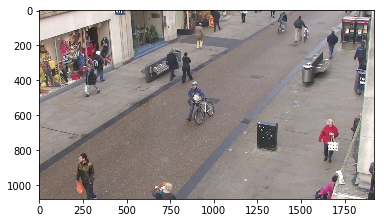

In [441]:
vs = cv2.VideoCapture('TownCentreXVID.avi')
success,frame = vidcap.read()
rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

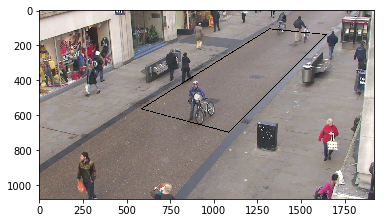

In [442]:
img = cv2.imread('town_centre_img.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

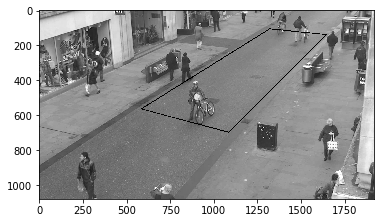

In [443]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')

# Find find contours

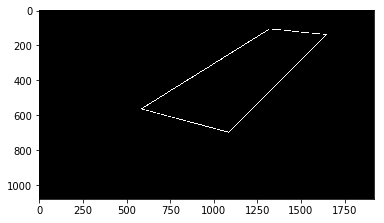

In [444]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=1)
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, 'gray')

In [445]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [446]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

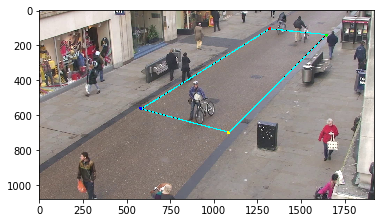

In [447]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
cv2.circle(img, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img, extRight, 8, (0, 255, 0), -1)
cv2.circle(img, extTop, 8, (255, 0, 0), -1)
cv2.circle(img, extBot, 8, (255, 255, 0), -1)
plt.imshow(img)

In [448]:
print(extLeft)
print(extRight)
print(extTop)
print(extBot)

(582, 562)
(1647, 143)
(1322, 105)
(1085, 700)


In [241]:
img.shape

(1080, 1920, 3)

# Bird eye view

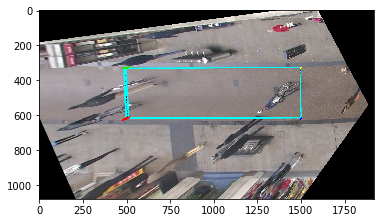

In [451]:
src = np.float32([extLeft, extBot, extTop, extRight])
x = 1500
y = 620
z = 330

q = 500
dst = np.float32([[x, y], [x, z], [q, y], [q, z]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

warped_img = cv2.warpPerspective(img, M, (1920, 1080)) # Image warping
plt.imshow(warped_img) # Show results
plt.show()

# Mapping a point

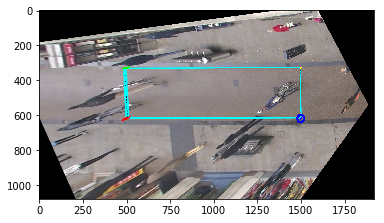

In [453]:
p = extLeft
px = (M[0][0]*p[0] + M[0][1]*p[1] + M[0][2]) / ((M[2][0]*p[0] + M[2][1]*p[1] + M[2][2]))
py = (M[1][0]*p[0] + M[1][1]*p[1] + M[1][2]) / ((M[2][0]*p[0] + M[2][1]*p[1] + M[2][2]))
p_after = (int(px), int(py))
# Draw the new point
cv2.circle(warped_img, p_after, 20, (0,0,255), 12)
plt.imshow(warped_img) # Show results
plt.show()